In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from keras.layers.core import Dense,Activation,Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [3]:
df=pd.read_excel('Train_dataset.xlsx')
df.head(10)

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534
5,AA6,BSE,Materials,259.61,38182.08,10.63,153.05,19263869.0,8.04,0.03,0.0344,74.9,1.15,5.51,158.687016
6,AA7,NYSE,Healthcare,635.37,12765.84,67.21,29.63,7086103.0,5.87,0.78,0.0186,1.0,0.75,8.60,209.645870
7,AA8,NSE,Real Estate,187.43,11270.15,NaN,89.69,NaN,NaN,-0.43,0.0370,74.9,0.78,6.73,861.481269
8,AA9,NSE,Materials,950.81,11270.15,31.50,159.58,1361019.0,2.72,0.03,0.0534,74.9,1.22,6.46,514.240811
9,AA10,JSE,Healthcare,961.02,55722.00,72.16,29.61,14385395.0,7.87,0.78,0.0292,NaN,1.21,4.42,239.085804


In [4]:
df.shape

(7383, 15)

In [5]:
df.isnull().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

In [8]:
for i in range(len(df)):
    if math.isnan(df.loc[:,['VWAP']].values[i]):
        df.loc[:,'VWAP'][i]=round(df['Stock Price'][i],2)
df.head(10)

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,382.96,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534
5,AA6,BSE,Materials,259.61,38182.08,10.63,153.05,19263869.0,8.04,0.03,0.0344,74.9,1.15,5.51,158.687016
6,AA7,NYSE,Healthcare,635.37,12765.84,67.21,29.63,7086103.0,5.87,0.78,0.0186,1.0,0.75,8.60,209.645870
7,AA8,NSE,Real Estate,187.43,11270.15,NaN,89.69,NaN,NaN,-0.43,0.0370,74.9,0.78,6.73,861.481269
8,AA9,NSE,Materials,950.81,11270.15,31.50,159.58,1361019.0,2.72,0.03,0.0534,74.9,1.22,6.46,514.240811
9,AA10,JSE,Healthcare,961.02,55722.00,72.16,29.61,14385395.0,7.87,0.78,0.0292,NaN,1.21,4.42,239.085804


In [9]:
for i in range(len(df)):
    if math.isnan(df.loc[:,['Put-Call Ratio']].values[i]):
        df.loc[:,['Put-Call Ratio']][i]=0.7
    

In [10]:
df.head(10)

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,382.96,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534
5,AA6,BSE,Materials,259.61,38182.08,10.63,153.05,19263869.0,8.04,0.03,0.0344,74.9,1.15,5.51,158.687016
6,AA7,NYSE,Healthcare,635.37,12765.84,67.21,29.63,7086103.0,5.87,0.78,0.0186,1.0,0.75,8.60,209.645870
7,AA8,NSE,Real Estate,187.43,11270.15,NaN,89.69,NaN,NaN,-0.43,0.0370,74.9,0.78,6.73,861.481269
8,AA9,NSE,Materials,950.81,11270.15,31.50,159.58,1361019.0,2.72,0.03,0.0534,74.9,1.22,6.46,514.240811
9,AA10,JSE,Healthcare,961.02,55722.00,72.16,29.61,14385395.0,7.87,0.78,0.0292,NaN,1.21,4.42,239.085804


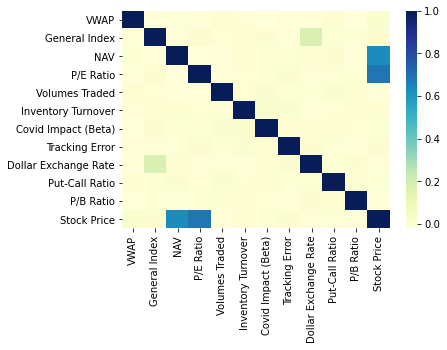

In [11]:
sns.heatmap(df.corr(),cmap="YlGnBu")

In [12]:
df=df.dropna(subset=['NAV'])
df=df.dropna(subset=['P/E Ratio'])
df.shape

(7122, 15)

Text(0, 0.5, 'NAV')

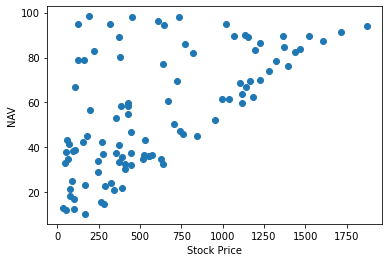

In [13]:
plt.scatter(df['Stock Price'][400:500],df['NAV'][400:500])
plt.xlabel('Stock Price')
plt.ylabel('NAV')

Text(0, 0.5, 'P/E Ratio')

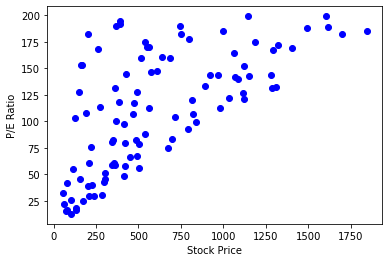

In [14]:
plt.scatter(df['Stock Price'][:100],df['P/E Ratio'][:100],color='blue')
plt.xlabel('Stock Price')
plt.ylabel('P/E Ratio')

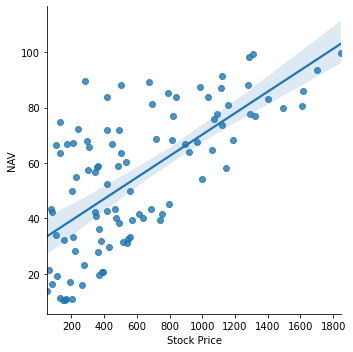

In [15]:
sns.lmplot(x='Stock Price',y='NAV',data=df[:100])

In [16]:
X=df[['NAV','P/E Ratio']]
y=df['Stock Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
print(model.intercept_)
print(model.coef_)

-577.6764575133121
[10.6804338  5.3424689]


In [18]:
y_predict=model.predict(X_test)
mean_squared_error(y_test,y_predict)

21197.51065678464

In [19]:
score=model.score(X_test,y_test)
score

0.8787721009428139

In [20]:
df1=pd.read_excel('Test_dataset.xlsx')
df1=df1.dropna(subset=['NAV'])
df1=df1.dropna(subset=['P/E Ratio'])
df1.shape

(3039, 14)

In [21]:
X=df1[['NAV','P/E Ratio']]
y=model.predict(X)
df1['Stock Price']=y
df1.head(10)

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66,887.401654
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11,396.509098
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99,1314.334677
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26,833.232690
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18,379.604340
5,AC3240,NSE,Healthcare,301.09,11270.15,25.27,149.36,9878930.0,8.17,0.78,0.0233,74.9,NaN,1.12,490.169259
6,AC3241,BSE,Materials,227.28,38182.08,38.50,193.01,4934899.0,4.91,0.03,0.0265,74.9,1.23,4.60,864.670166
7,AC3242,S&P 500,Real Estate,NaN,NaN,73.40,121.63,4070029.0,6.11,-0.43,0.0504,1.0,1.00,4.72,856.071876
8,AC3243,NSE,Energy,NaN,NaN,54.33,169.47,13609149.0,4.93,0.11,0.0609,74.9,1.00,3.96,907.979715
9,AC3244,NSE,Healthcare,727.98,11270.15,99.59,139.23,12499327.0,4.65,0.78,0.0206,74.9,1.07,2.58,1229.819889
